## specifying the folder where images are present

In [1]:
TrainingImagePath = "C:\\Users\\syeda\\OneDrive\\Documents\\Computer vision\\Face Rec\\train"

In [2]:
validationImagePath = "C:\\Users\\syeda\\OneDrive\\Documents\\Computer vision\\Face Rec\\validation"

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#base model

train_datagen = ImageDataGenerator(rescale = 1./225)

test_datagen = ImageDataGenerator(rescale = 1./225)

In [5]:
#Generating the training data
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 344 images belonging to 37 classes.


# Validation set

In [6]:
#Generating the validation data
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 111 images belonging to 37 classes.


In [7]:
# Libraries and model type

# Create CNN Deep learning model

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [8]:
# Initializing the Convolutional Neural Network

classifier = Sequential()

# MODEL

In [9]:
# STEP 1 Convolution
# Adding th e first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size (64x64) pixels representing Red, Green and Blue components of pixels

In [10]:
#STEP 1 Convolution
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [11]:
#STEP 2- Max Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

In [12]:
# Additional layer of convolution for better accuracy

In [13]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [14]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [15]:
#STEP 3- Flattening
classifier.add(Flatten())

In [16]:
#STEP 4 - Fully connected neural network
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(37, activation='softmax'))

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

# Compiler

In [18]:
# Compiling the CNN
classifier.compile(loss='categorical_crossentropy',
                  optimizer = 'adam', metrics =['accuracy'])

# Execution of model

In [19]:
# Starting the model training
import warnings
warnings.filterwarnings('ignore')

In [20]:
history = classifier.fit_generator(training_set, epochs =10,
                                  validation_data=validation_set)

Epoch 1/10
18/18 [==============================] - 21s 1s/step - loss: 3.7194 - accuracy: 0.0262 - val_loss: 3.5887 - val_accuracy: 0.0721
Epoch 2/10
18/18 [==============================] - 18s 985ms/step - loss: 3.5548 - accuracy: 0.0436 - val_loss: 3.4785 - val_accuracy: 0.0631
Epoch 3/10
18/18 [==============================] - 18s 989ms/step - loss: 3.3883 - accuracy: 0.1047 - val_loss: 3.2325 - val_accuracy: 0.1622
Epoch 4/10
18/18 [==============================] - 18s 1s/step - loss: 3.0087 - accuracy: 0.2180 - val_loss: 2.8349 - val_accuracy: 0.2252
Epoch 5/10
18/18 [==============================] - 18s 1s/step - loss: 2.4181 - accuracy: 0.3605 - val_loss: 2.5284 - val_accuracy: 0.2613
Epoch 6/10
18/18 [==============================] - 18s 1s/step - loss: 1.8145 - accuracy: 0.4738 - val_loss: 2.0683 - val_accuracy: 0.4595
Epoch 7/10
18/18 [==============================] - 18s 1s/step - loss: 1.3391 - accuracy: 0.6395 - val_loss: 1.8548 - val_accuracy: 0.5225
Epoch 8/10
18/

## Accuracy base model

In [21]:
#Displaying curves of loss and accuracy during training

In [22]:
import matplotlib.pyplot as plt

In [23]:
acc = history.history['accuracy']

In [24]:
val_acc = history.history['val_accuracy']

In [25]:
loss = history.history['loss']

In [26]:
val_loss = history.history['val_loss']

In [27]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

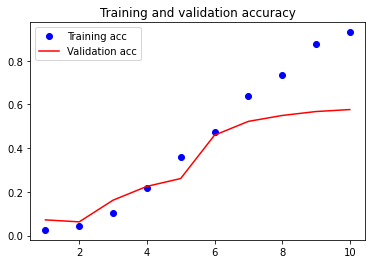

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Loss base model

<Figure size 432x288 with 0 Axes>

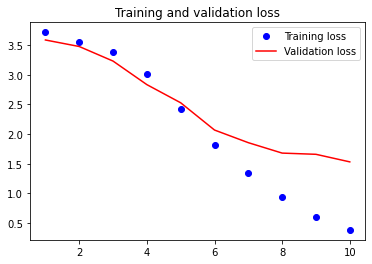

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [30]:
# Lets improve

In [31]:
# Model 2

In [33]:
# Adding parameters in the ImageDatagenerator
train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5,
                                  zoom_range=0.5, width_shift_range=0.2,
                                  height_shift_range=0.2)

In [34]:
# No transformations are done on the testing images

In [35]:
test_datgen = ImageDataGenerator(rescale=1./225)

In [37]:
# Generating the training data
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 344 images belonging to 37 classes.


In [39]:
# Generating the validation data
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 111 images belonging to 37 classes.


In [40]:
#Create Cnn deep learning model

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [41]:
# Initializing the Convolutional Neural Network

classifier = Sequential()

In [42]:
# Convolution

classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [43]:
#Max Pooling

classifier.add(MaxPool2D(pool_size=(2,2)))

In [44]:
# Additional layer of convolution for better accuracy

In [45]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [46]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [47]:
#Flattening

In [48]:
classifier.add(Flatten())

In [49]:
#Fully connected neural network

In [50]:
classifier.add(Dense(64, activation='relu'))#hidden layer

In [51]:
classifier.add(Dense(37, activation='softmax'))#output layer

In [52]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [53]:
#Compiler

In [54]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

In [55]:
#Execute

In [56]:
#Starting the model training

In [57]:
history = classifier.fit_generator(training_set, epochs =100,
                                  validation_data=validation_set)

Epoch 1/100
18/18 [==============================] - 24s 1s/step - loss: 3.6272 - accuracy: 0.0436 - val_loss: 3.5836 - val_accuracy: 0.0721
Epoch 2/100
18/18 [==============================] - 23s 1s/step - loss: 3.5705 - accuracy: 0.0698 - val_loss: 3.4872 - val_accuracy: 0.0901
Epoch 3/100
18/18 [==============================] - 21s 1s/step - loss: 3.4673 - accuracy: 0.0814 - val_loss: 3.2640 - val_accuracy: 0.1081
Epoch 4/100
18/18 [==============================] - 20s 1s/step - loss: 3.2733 - accuracy: 0.1076 - val_loss: 3.1003 - val_accuracy: 0.1351
Epoch 5/100
18/18 [==============================] - 19s 1s/step - loss: 3.1755 - accuracy: 0.1512 - val_loss: 3.0219 - val_accuracy: 0.1532
Epoch 6/100
18/18 [==============================] - 19s 1s/step - loss: 3.0870 - accuracy: 0.1424 - val_loss: 2.8523 - val_accuracy: 0.1712
Epoch 7/100
18/18 [==============================] - 19s 1s/step - loss: 2.8853 - accuracy: 0.1831 - val_loss: 2.6571 - val_accuracy: 0.1982
Epoch 8/100
1

In [58]:
#Displaying curves of loss and accuracy during training

In [59]:
import matplotlib.pyplot as plt

In [60]:
acc = history.history['accuracy']

In [61]:
val_acc = history.history['val_accuracy']

In [62]:
loss = history.history['loss']

In [63]:
val_loss = history.history['val_loss']

In [64]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

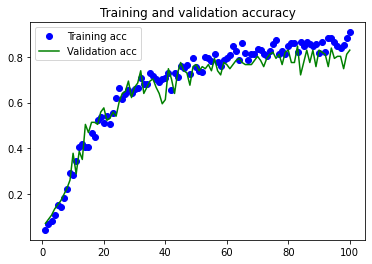

<Figure size 432x288 with 0 Axes>

In [65]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

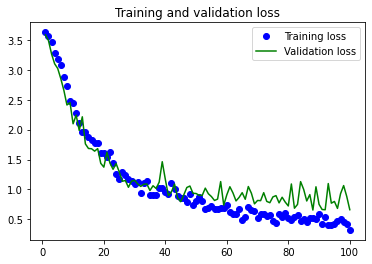

<Figure size 432x288 with 0 Axes>

In [66]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()